In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from countryinfo import CountryInfo

df_cases = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
# Recovered dataset is not very reliable
df_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

In [24]:
df_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,484,521,555,607,665,714,784,840,906,933
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,583,601,601,638,646,659,673,673,696,704
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24


In [25]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,15,15,18,18,21,23,25,30,30,30
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,23,23,23,23,24,25,26,26,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,235,256,275,293,313,326,336,348,364,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,25,26,26,29,29,31,33,33,35,35
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [26]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,32,32,32,32,40,43,54,99,112
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,165,182,197,217,232,248,251,277,283,302
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,347,405,460,591,601,691,708,783,846,894
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,58,71,71,128,128,128,169,169,191,205
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,4,4,4,5,5,5,5,6


In [27]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 92 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  264 non-null    object 
 2   Lat             264 non-null    float64
 3   Long            264 non-null    float64
 4   1/22/20         264 non-null    int64  
 5   1/23/20         264 non-null    int64  
 6   1/24/20         264 non-null    int64  
 7   1/25/20         264 non-null    int64  
 8   1/26/20         264 non-null    int64  
 9   1/27/20         264 non-null    int64  
 10  1/28/20         264 non-null    int64  
 11  1/29/20         264 non-null    int64  
 12  1/30/20         264 non-null    int64  
 13  1/31/20         264 non-null    int64  
 14  2/1/20          264 non-null    int64  
 15  2/2/20          264 non-null    int64  
 16  2/3/20          264 non-null    int64  
 17  2/4/20          264 non-null    int

Well, it seems like all the dates are in integers, this is correct. The Latitude and Longitude columns are the only ones I'll have to change, as this should be a geolocated object.

In [28]:
df_cases[df_cases['Province/State'].notna()]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,100,103,103,103,102,103,103,103,103,103
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2773,2822,2857,2857,2863,2870,2886,2897,2926,2926
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,28,28,28,28,28,28,28,28,28,28
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,953,965,974,983,987,998,999,1001,1007,1015
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,420,428,429,429,429,433,433,433,435,435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,4,4
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,8,8,8,9,10,10,10,11,11,11
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,0,0,0,0,0,0,...,2,2,2,3,3,3,3,3,3,3
258,Falkland Islands (Malvinas),United Kingdom,-51.7963,-59.5236,0,0,0,0,0,0,...,5,5,5,5,5,11,11,11,11,11


In [29]:
df_cases[df_cases['Country/Region']=='France']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,83,83,83,86,86,86,86,86,96,96
108,French Polynesia,France,-17.6797,149.4068,0,0,0,0,0,0,...,51,51,51,53,55,55,55,55,55,55
109,Guadeloupe,France,16.2500,-61.5833,0,0,0,0,0,0,...,141,143,143,143,143,145,145,145,145,148
110,Mayotte,France,-12.8275,45.1662,0,0,0,0,0,0,...,184,191,196,196,207,217,217,233,245,254
111,New Caledonia,France,-20.9043,165.6180,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
112,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,362,382,388,389,391,391,391,394,402,407
113,Saint Barthelemy,France,17.9000,-62.8333,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,32,32,32,32,32,32,35,35,35,37
115,Martinique,France,14.6415,-61.0242,0,0,0,0,0,0,...,154,155,155,155,157,157,158,158,158,158
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,86334,90676,93790,120633,124298,130253,133470,145960,147969,147969


I will create a seperate Dataframe which will not contain any Province/States!

In [30]:
df_country = df_cases.groupby("Country/Region").sum()

#Lets check if that worked:
for i in df_cases['Country/Region']:
    if df_cases[df_cases['Country/Region']==i]['4/18/20'].sum() == df_country.loc[i,'4/18/20']:
        pass
    else:
        print ('FAILURE')

# Seems like all is good, we can now use the df_country dataframe
df_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,484,521,555,607,665,714,784,840,906,933
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,583,601,601,638,646,659,673,673,696,704
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24


/Users/sebastiangraff/opt/anaconda3/envs/COVID19/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


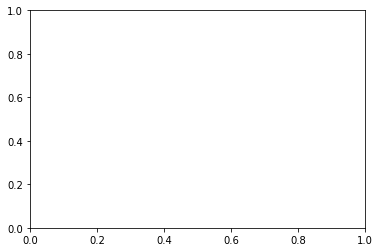

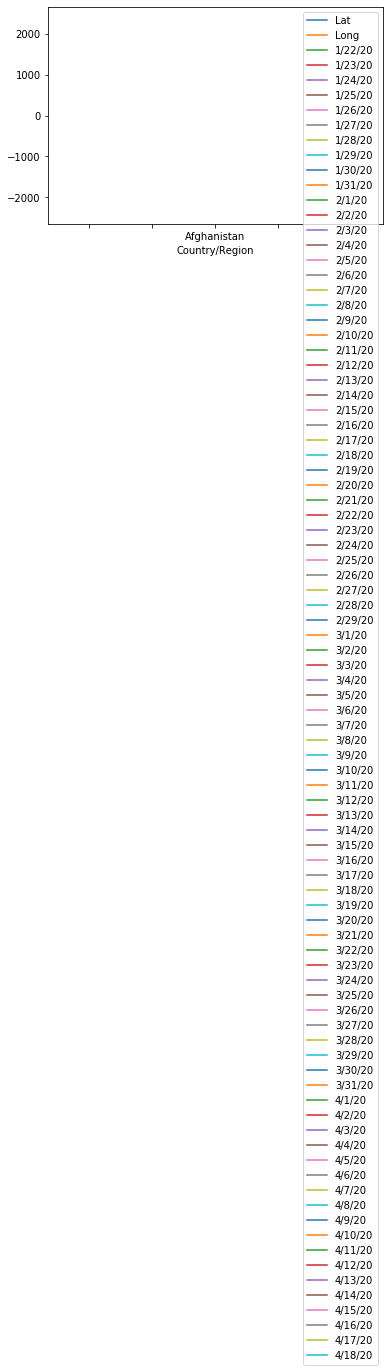

In [31]:
fig, ax = plt.subplots()
df_country[df_country == 'Afghanistan'].plot()

Well that looks terrible, lets change that...

In [32]:
# Drop Latitude and Longitude and transpose df_country to swap rows and columns
df_country = df_country.drop(['Lat','Long'], axis = 1).T # or df_country.transpose()

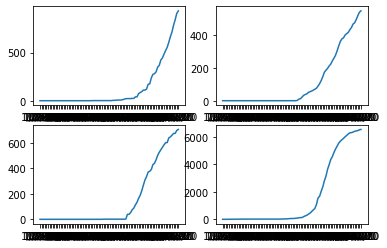

In [33]:
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0,0].plot(df_country['Afghanistan'])
ax[0,1].plot(df_country['Albania'])
ax[1,0].plot(df_country['Andorra'])
ax[1,1].plot(df_country['Australia'])

plt.show()

Well the above plots look shocking, lets repair that, and make the plots more beatiful

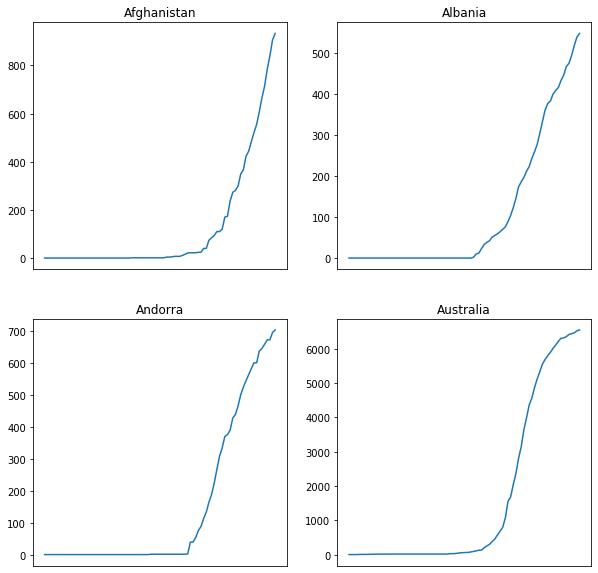

In [34]:
fig, ax = plt.subplots(figsize = (10,10),nrows=2,ncols=2)
    
ax[0,0].plot(df_country['Afghanistan'])
ax[0,0].set_title("Afghanistan")

ax3 = ax[0,1].plot(df_country['Albania'])
ax[0,1].set_title("Albania")

ax3 = ax[1,0].plot(df_country['Andorra'])
ax[1,0].set_title("Andorra")

ax4 = ax[1,1].plot(df_country['Australia'])
ax[1,1].set_title("Australia")

#The below code iterates through the 
for axis in ax.reshape(-1): 
    axis.tick_params(axis='x',which='both',bottom=False,labelbottom=False)

plt.show();

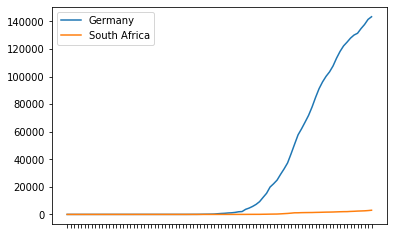

In [35]:
#Check the difference between my home countries (Germany and South Africa)
plt.plot(df_country['Germany'], label = 'Germany')
plt.plot(df_country['South Africa'], label = 'South Africa')
plt.tick_params(axis='x',which='both',labelbottom=False)

plt.legend()
plt.show();

In [36]:
# I also want to investigate if there are any null values
df_country.isna().sum().describe()

count    185.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64

Nope, no NaN values, lets continue by also formatting the deaths dataframe to be like the new df_country dataframe.

In [37]:
df_country_deaths = df_deaths.groupby("Country/Region").sum()
df_country_deaths = df_country_deaths.drop(['Lat','Long'], axis = 1).T # or df_country.transpose()

In [38]:
df_country_deaths.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


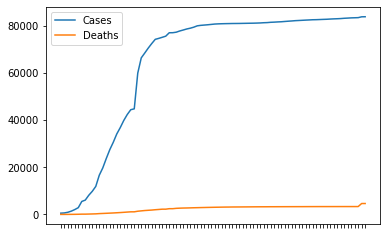

In [39]:
plt.plot(df_country['China'], label = 'Cases')
plt.plot(df_country_deaths['China'], label = 'Deaths')
plt.tick_params(axis='x',which='both',labelbottom=False)

plt.legend()
plt.show();

Lets Analyze a lot more, below are just a few ideas:

**Ideas:**
* Replacement Rate
* Map
* Introduce testing count
* Combine countries with continents

In [40]:
df_country.sum()

Country/Region
Afghanistan           10907
Albania                9671
Algeria               35465
Andorra               13119
Angola                  343
                      ...  
West Bank and Gaza     6348
Western Sahara           70
Yemen                     9
Zambia                  960
Zimbabwe                310
Length: 185, dtype: int64

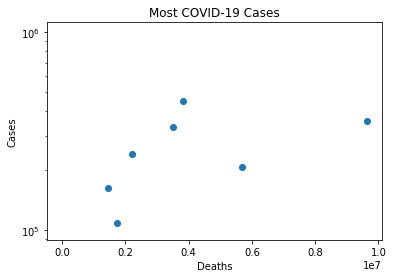

In [41]:
# Global Graph
plt.scatter(x=df_country.sum(),y=df_country_deaths.sum())
plt.title('Most COVID-19 Cases')
plt.xlabel('Deaths')
plt.ylabel('Cases')
plt.yscale('log')
plt.show();

In [42]:
df_country.sum()

Country/Region
Afghanistan           10907
Albania                9671
Algeria               35465
Andorra               13119
Angola                  343
                      ...  
West Bank and Gaza     6348
Western Sahara           70
Yemen                     9
Zambia                  960
Zimbabwe                310
Length: 185, dtype: int64

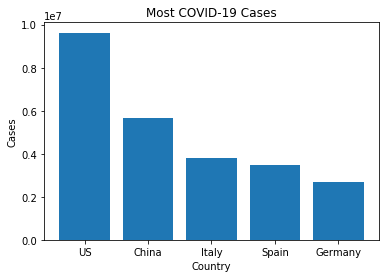

In [43]:
plt.bar(x = df_country.sum().sort_values(ascending=False).head(5).index,
        height=df_country.sum().sort_values(ascending=False).head(5))
plt.title('Most COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Cases')
plt.show()

## Make new dataframe to contain many new variables

In [72]:
#country = CountryInfo('FalKLanD Islands').region()

continents = lambda country: CountryInfo(country).region()
test = df_cases['Country/Region'].apply(continents)

KeyError: 'andorra'

In [77]:
country = CountryInfo('serbia').region()

KeyError: 'serbia'